In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


/kaggle/input/us-shape/cb_2018_us_county_500k.shp.ea.iso.xml
/kaggle/input/us-shape/cb_2018_us_county_500k.cpg
/kaggle/input/us-shape/cb_2018_us_county_500k.shp.iso.xml
/kaggle/input/us-shape/cb_2018_us_county_500k.shp
/kaggle/input/us-shape/cb_2018_us_county_500k.shx
/kaggle/input/us-shape/cb_2018_us_county_500k.dbf
/kaggle/input/us-shape/cb_2018_us_county_500k.prj
/kaggle/input/maryland-vehicle-crash-data/Maryland_Statewide_Vehicle_Crashes.csv


In [2]:
df = pd.read_csv('../input/maryland-vehicle-crash-data/Maryland_Statewide_Vehicle_Crashes.csv')
df.head(5)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (34,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,YEAR,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_DESC,JUNCTION_CODE,...,FEET_MILES_FLAG_DESC,FEET_MILES_FLAG,DISTANCE_DIR_FLAG,REFERENCE_NO,REFERENCE_TYPE_CODE,REFERENCE_SUFFIX,REFERENCE_ROAD_NAME,LATITUDE,LONGITUDE,LOCATION
0,2020,Q2,Daylight,1.00,Baltimore,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.277263,-76.503693,POINT (-76.5036932 39.27726285)
1,2020,Q2,NaN,6.02,Baltimore City,24.0,NaN,NaN,Non Intersection,1.0,...,Miles,M,N,NaN,NaN,NaN,NORTH AVE,39.311025,-76.616429,POINT (-76.616429453205 39.311024794431)
2,2020,Q2,Daylight,1.00,Montgomery,15.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.140680,-77.193413,POINT (-77.193412729561 39.140680249069)
3,2017,Q2,Daylight,1.00,Baltimore City,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.282928,-76.635215,POINT (-76.6352150952347 39.2829284750108)
4,2020,Q2,Daylight,1.00,Cecil,7.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.611028,-75.951314,POINT (-75.951314 39.611027833333)


In [3]:
df.shape # 771145 rows, 56 columns

(771145, 56)

In [4]:
for col in df.columns:
    print(col)

YEAR
QUARTER
LIGHT_DESC
LIGHT_CODE
COUNTY_DESC
COUNTY_NO
MUNI_DESC
MUNI_CODE
JUNCTION_DESC
JUNCTION_CODE
COLLISION_TYPE_DESC
COLLISION_TYPE_CODE
SURF_COND_DESC
SURF_COND_CODE
LANE_DESC
LANE_CODE
RD_COND_DESC
RD_COND_CODE
RD_DIV_DESC
RD_DIV_CODE
FIX_OBJ_DESC
FIX_OBJ_CODE
REPORT_NO
REPORT_TYPE
WEATHER_DESC
WEATHER_CODE
ACC_DATE
ACC_TIME
LOC_CODE
SIGNAL_FLAG_DESC
SIGNAL_FLAG
C_M_ZONE_FLAG
AGENCY_CODE
AREA_CODE
HARM_EVENT_DESC1
HARM_EVENT_CODE1
HARM_EVENT_DESC2
HARM_EVENT_CODE2
RTE_NO
ROUTE_TYPE_CODE
RTE_SUFFIX
LOG_MILE
LOGMILE_DIR_FLAG_DESC
LOGMILE_DIR_FLAG
MAINROAD_NAME
DISTANCE
FEET_MILES_FLAG_DESC
FEET_MILES_FLAG
DISTANCE_DIR_FLAG
REFERENCE_NO
REFERENCE_TYPE_CODE
REFERENCE_SUFFIX
REFERENCE_ROAD_NAME
LATITUDE
LONGITUDE
LOCATION


In [5]:
for col in df.columns:
    print(col)
    print(df[col].unique())

YEAR
[2020 2017 2018 2015 2016 2021 2019]
QUARTER
['Q2' 'Q4' 'Q1' 'Q3']
LIGHT_DESC
['Daylight' nan 'Dark Lights On' 'Not Applicable' 'Dark No Lights'
 'Unknown' 'Other' 'Dawn' 'Dark - Unknown Lighting' 'Dusk']
LIGHT_CODE
[ 1.    6.02  3.    0.    5.02  4.   99.    7.88 88.  ]
COUNTY_DESC
['Baltimore' 'Baltimore City' 'Montgomery' 'Cecil' 'Anne Arundel'
 'Frederick' "Prince George's" 'Talbot' 'Harford' 'Kent' 'Wicomico'
 "Queen Anne's" 'Worcester' 'Carroll' 'Howard' 'Charles' 'Garrett'
 'Dorchester' 'Calvert' 'Washington' "St. Mary's" 'Allegany' 'Somerset'
 'Caroline' nan]
COUNTY_NO
[ 3. 24. 15.  7.  2. 10. 16. 20. 12. 14. 22. 17. 23.  6. 13.  8. 11.  9.
  4. 21. 18.  1. 19.  5. nan]
MUNI_DESC
[nan]
MUNI_CODE
[ nan   0.  12. 999.   1. 130. 115.  71. 133.  41.  89.  37. 104. 155.
  57. 121.  11. 156.  13. 117.  49.  74.  63.  52.  28.  33.  72.  23.
   3.  73. 134. 157.  44.  82.  87.  88. 126.   7. 102.  19. 147.  45.
  76.  67.  50. 143.  54.  62. 132. 113. 135.  91. 502. 112.  53.  81

In [6]:
# Dropping irrelevant columns and cleaning up NaNs
# can use fillna instead

df.drop(['MUNI_DESC'], axis=1, inplace=True)
df.drop(['AREA_CODE'], axis=1, inplace=True) # contains only 1 possible value
df.FEET_MILES_FLAG.replace(np.nan, 'U', inplace=True)
df.LOGMILE_DIR_FLAG.replace(np.nan, 'U', inplace=True)
df.WEATHER_DESC.replace(np.nan, 'Unknown', inplace=True)
df.LIGHT_DESC.replace(np.nan, 'Unknown', inplace=True)
df.SURF_COND_DESC.replace(np.nan, 'Unknown', inplace=True)
df.DISTANCE_DIR_FLAG.replace(np.nan, 'U', inplace=True)
df.FIX_OBJ_DESC.replace(np.nan, 'Not Applicable', inplace=True)
df.REFERENCE_TYPE_CODE.replace(np.nan, 'Unknown', inplace=True)
df.REFERENCE_SUFFIX.replace(np.nan, 'Unknown', inplace=True)
df.REFERENCE_ROAD_NAME.replace(np.nan, 'Unknown', inplace=True)

df.MAINROAD_NAME.fillna("Unknown")
df.RTE_SUFFIX.fillna("Unknown")

0         Unknown
1         Unknown
2         Unknown
3         Unknown
4         Unknown
           ...   
771140    Unknown
771141    Unknown
771142    Unknown
771143    Unknown
771144    Unknown
Name: RTE_SUFFIX, Length: 771145, dtype: object

In [7]:
pd.set_option('max_columns', 54)
df.head(5)

,YEAR,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_CODE,JUNCTION_DESC,JUNCTION_CODE,COLLISION_TYPE_DESC,COLLISION_TYPE_CODE,SURF_COND_DESC,SURF_COND_CODE,LANE_DESC,LANE_CODE,RD_COND_DESC,RD_COND_CODE,RD_DIV_DESC,RD_DIV_CODE,FIX_OBJ_DESC,FIX_OBJ_CODE,REPORT_NO,REPORT_TYPE,WEATHER_DESC,WEATHER_CODE,ACC_DATE,ACC_TIME,LOC_CODE,SIGNAL_FLAG_DESC,SIGNAL_FLAG,C_M_ZONE_FLAG,AGENCY_CODE,HARM_EVENT_DESC1,HARM_EVENT_CODE1,HARM_EVENT_DESC2,HARM_EVENT_CODE2,RTE_NO,ROUTE_TYPE_CODE,RTE_SUFFIX,LOG_MILE,LOGMILE_DIR_FLAG_DESC,LOGMILE_DIR_FLAG,MAINROAD_NAME,DISTANCE,FEET_MILES_FLAG_DESC,FEET_MILES_FLAG,DISTANCE_DIR_FLAG,REFERENCE_NO,REFERENCE_TYPE_CODE,REFERENCE_SUFFIX,REFERENCE_ROAD_NAME,LATITUDE,LONGITUDE,LOCATION
0,2020,Q2,Daylight,1.00,Baltimore,3.0,NaN,NaN,NaN,Other,88,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,AE58770052,Property Damage Crash,Not Applicable,0.00,20200618,15:15:00,NaN,No,N,N,BACOPD,Parked Vehicle,2.0,Not Applicable,0.0,NaN,NaN,NaN,NaN,NaN,U,NaN,NaN,NaN,U,U,NaN,Unknown,Unknown,Unknown,39.277263,-76.503693,POINT (-76.5036932 39.27726285)
1,2020,Q2,Unknown,6.02,Baltimore City,24.0,NaN,Non Intersection,1.0,Other,88,Dry,2.0,Left Turn Lane,2.0,No Defects,1.0,One-way Trafficway,2.0,Other Pole,10.0,ADJ984001J,Injury Crash,Unknown,7.01,20200430,06:39:00,1003,Yes,Y,N,BALTIMORE,Other Vehicle,1.0,Other Vehicle,1.0,NaN,NaN,NaN,0.0,NaN,U,CHARLES STREET,2.0,Miles,M,N,NaN,Unknown,Unknown,NORTH AVE,39.311025,-76.616429,POINT (-76.616429453205 39.311024794431)
2,2020,Q2,Daylight,1.00,Montgomery,15.0,NaN,NaN,NaN,Other,88,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,EJ7878001D,Injury Crash,Unknown,6.01,20200504,09:46:00,54222,No,N,N,GAITHERSBURG,Pedestrian,3.0,Not Applicable,0.0,NaN,NaN,NaN,NaN,NaN,U,NaN,NaN,NaN,U,U,NaN,Unknown,Unknown,Unknown,39.140680,-77.193413,POINT (-77.193412729561 39.140680249069)
3,2017,Q2,Daylight,1.00,Baltimore City,24.0,NaN,NaN,NaN,Single Vehicle,17,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,ADI7910042,Injury Crash,Other,88.00,20170507,10:39:00,CAD#0830,Yes,Y,N,BALTIMORE,NaN,3.0,Not Applicable,0.0,NaN,NaN,NaN,NaN,NaN,U,NaN,NaN,NaN,U,U,NaN,Unknown,Unknown,Unknown,39.282928,-76.635215,POINT (-76.6352150952347 39.2829284750108)
4,2020,Q2,Daylight,1.00,Cecil,7.0,NaN,NaN,NaN,Same Direction Rear End,3,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,MSP6709008R,Property Damage Crash,Unknown,6.01,20200414,17:32:00,NaN,No,N,N,MSP,Other Vehicle,1.0,Not Applicable,0.0,NaN,NaN,NaN,NaN,NaN,U,NaN,NaN,NaN,U,U,NaN,Unknown,Unknown,Unknown,39.611028,-75.951314,POINT (-75.951314 39.611027833333)


In [8]:
df.isna().sum()

YEAR                          0
QUARTER                       0
LIGHT_DESC                    0
LIGHT_CODE                    0
COUNTY_DESC                   9
COUNTY_NO                     9
MUNI_CODE                196814
JUNCTION_DESC            103245
JUNCTION_CODE             77041
COLLISION_TYPE_DESC           0
COLLISION_TYPE_CODE           0
SURF_COND_DESC                0
SURF_COND_CODE            77041
LANE_DESC                185400
LANE_CODE                185392
RD_COND_DESC              77041
RD_COND_CODE              77041
RD_DIV_DESC               81181
RD_DIV_CODE               77041
FIX_OBJ_DESC                  0
FIX_OBJ_CODE                  0
REPORT_NO                     0
REPORT_TYPE              110733
WEATHER_DESC                  0
WEATHER_CODE                  0
ACC_DATE                      0
ACC_TIME                      0
LOC_CODE                 414567
SIGNAL_FLAG_DESC              0
SIGNAL_FLAG                   0
C_M_ZONE_FLAG                 0
AGENCY_C

In [9]:
df.isna().sum()

YEAR                          0
QUARTER                       0
LIGHT_DESC                    0
LIGHT_CODE                    0
COUNTY_DESC                   9
COUNTY_NO                     9
MUNI_CODE                196814
JUNCTION_DESC            103245
JUNCTION_CODE             77041
COLLISION_TYPE_DESC           0
COLLISION_TYPE_CODE           0
SURF_COND_DESC                0
SURF_COND_CODE            77041
LANE_DESC                185400
LANE_CODE                185392
RD_COND_DESC              77041
RD_COND_CODE              77041
RD_DIV_DESC               81181
RD_DIV_CODE               77041
FIX_OBJ_DESC                  0
FIX_OBJ_CODE                  0
REPORT_NO                     0
REPORT_TYPE              110733
WEATHER_DESC                  0
WEATHER_CODE                  0
ACC_DATE                      0
ACC_TIME                      0
LOC_CODE                 414567
SIGNAL_FLAG_DESC              0
SIGNAL_FLAG                   0
C_M_ZONE_FLAG                 0
AGENCY_C

In [10]:
df.shape

(771145, 54)

In [11]:
# Missing value imputation where it makes sense
mean = df['LOG_MILE'].mean() #imputing item_weight with mean
df['LOG_MILE'].fillna(mean, inplace =True)

In [12]:
# Further columns to drop: too many missing values
df.drop(['REFERENCE_SUFFIX'], axis=1, inplace=True)
df.drop(['HARM_EVENT_DESC1'], axis=1, inplace=True)
df.drop(['RTE_SUFFIX'], axis=1, inplace=True)
df.drop(['FEET_MILES_FLAG_DESC'], axis=1, inplace=True)
df.shape

(771145, 50)

In [13]:
df.dtypes

YEAR                       int64
QUARTER                   object
LIGHT_DESC                object
LIGHT_CODE               float64
COUNTY_DESC               object
COUNTY_NO                float64
MUNI_CODE                float64
JUNCTION_DESC             object
JUNCTION_CODE            float64
COLLISION_TYPE_DESC       object
COLLISION_TYPE_CODE        int64
SURF_COND_DESC            object
SURF_COND_CODE           float64
LANE_DESC                 object
LANE_CODE                float64
RD_COND_DESC              object
RD_COND_CODE             float64
RD_DIV_DESC               object
RD_DIV_CODE              float64
FIX_OBJ_DESC              object
FIX_OBJ_CODE             float64
REPORT_NO                 object
REPORT_TYPE               object
WEATHER_DESC              object
WEATHER_CODE             float64
ACC_DATE                   int64
ACC_TIME                  object
LOC_CODE                  object
SIGNAL_FLAG_DESC          object
SIGNAL_FLAG               object
C_M_ZONE_F

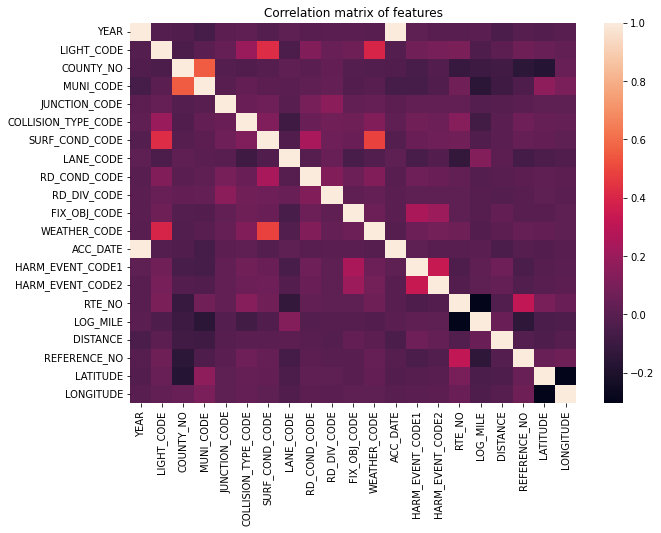

In [14]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,7)) 
sns.heatmap(corr)
plt.title("Correlation matrix of features")
plt.show()

In [15]:
df_geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.LONGITUDE, df.LATITUDE))
df_geo_reduced = df_geo.head(1000)
df_geo_reduced.head(5)

,YEAR,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_CODE,JUNCTION_DESC,JUNCTION_CODE,COLLISION_TYPE_DESC,COLLISION_TYPE_CODE,SURF_COND_DESC,SURF_COND_CODE,LANE_DESC,LANE_CODE,RD_COND_DESC,RD_COND_CODE,RD_DIV_DESC,RD_DIV_CODE,FIX_OBJ_DESC,FIX_OBJ_CODE,REPORT_NO,REPORT_TYPE,WEATHER_DESC,WEATHER_CODE,ACC_DATE,ACC_TIME,LOC_CODE,SIGNAL_FLAG_DESC,SIGNAL_FLAG,C_M_ZONE_FLAG,AGENCY_CODE,HARM_EVENT_CODE1,HARM_EVENT_DESC2,HARM_EVENT_CODE2,RTE_NO,ROUTE_TYPE_CODE,LOG_MILE,LOGMILE_DIR_FLAG_DESC,LOGMILE_DIR_FLAG,MAINROAD_NAME,DISTANCE,FEET_MILES_FLAG,DISTANCE_DIR_FLAG,REFERENCE_NO,REFERENCE_TYPE_CODE,REFERENCE_ROAD_NAME,LATITUDE,LONGITUDE,LOCATION,geometry
0,2020,Q2,Daylight,1.00,Baltimore,3.0,NaN,NaN,NaN,Other,88,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,AE58770052,Property Damage Crash,Not Applicable,0.00,20200618,15:15:00,NaN,No,N,N,BACOPD,2.0,Not Applicable,0.0,NaN,NaN,4.821672,NaN,U,NaN,NaN,U,U,NaN,Unknown,Unknown,39.277263,-76.503693,POINT (-76.5036932 39.27726285),POINT (-76.50369 39.27726)
1,2020,Q2,Unknown,6.02,Baltimore City,24.0,NaN,Non Intersection,1.0,Other,88,Dry,2.0,Left Turn Lane,2.0,No Defects,1.0,One-way Trafficway,2.0,Other Pole,10.0,ADJ984001J,Injury Crash,Unknown,7.01,20200430,06:39:00,1003,Yes,Y,N,BALTIMORE,1.0,Other Vehicle,1.0,NaN,NaN,0.000000,NaN,U,CHARLES STREET,2.0,M,N,NaN,Unknown,NORTH AVE,39.311025,-76.616429,POINT (-76.616429453205 39.311024794431),POINT (-76.61643 39.31102)
2,2020,Q2,Daylight,1.00,Montgomery,15.0,NaN,NaN,NaN,Other,88,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,EJ7878001D,Injury Crash,Unknown,6.01,20200504,09:46:00,54222,No,N,N,GAITHERSBURG,3.0,Not Applicable,0.0,NaN,NaN,4.821672,NaN,U,NaN,NaN,U,U,NaN,Unknown,Unknown,39.140680,-77.193413,POINT (-77.193412729561 39.140680249069),POINT (-77.19341 39.14068)
3,2017,Q2,Daylight,1.00,Baltimore City,24.0,NaN,NaN,NaN,Single Vehicle,17,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,ADI7910042,Injury Crash,Other,88.00,20170507,10:39:00,CAD#0830,Yes,Y,N,BALTIMORE,3.0,Not Applicable,0.0,NaN,NaN,4.821672,NaN,U,NaN,NaN,U,U,NaN,Unknown,Unknown,39.282928,-76.635215,POINT (-76.6352150952347 39.2829284750108),POINT (-76.63522 39.28293)
4,2020,Q2,Daylight,1.00,Cecil,7.0,NaN,NaN,NaN,Same Direction Rear End,3,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,MSP6709008R,Property Damage Crash,Unknown,6.01,20200414,17:32:00,NaN,No,N,N,MSP,1.0,Not Applicable,0.0,NaN,NaN,4.821672,NaN,U,NaN,NaN,U,U,NaN,Unknown,Unknown,39.611028,-75.951314,POINT (-75.951314 39.611027833333),POINT (-75.95131 39.61103)


In [16]:
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<function matplotlib.pyplot.show(close=None, block=None)>

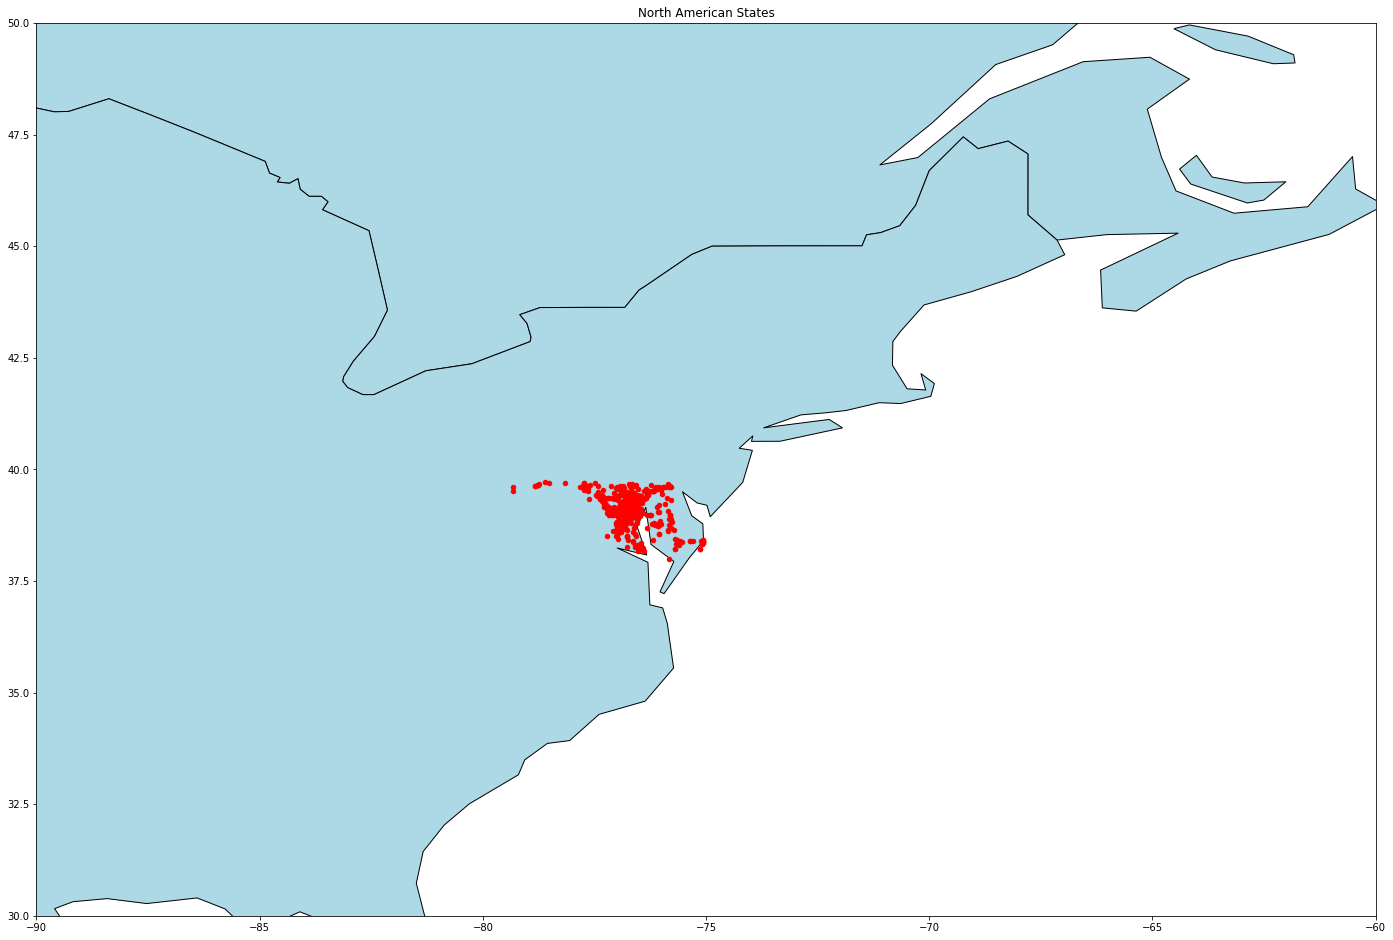

In [17]:
# plot world map
axis = world_data[world_data.continent == 'North America'].plot(
color = 'lightblue', edgecolor = 'black')
df_geo_reduced.plot(ax = axis, markersize=20, color = 'red')

plt.title('North American States')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(24, 18)
plt.xlim([-90, -60])
plt.ylim([30, 50])
fig.savefig('matplot.png', dpi=200)
plt.show